<a href="https://colab.research.google.com/github/Ufoan/Taller_curso_inf_cuantica_525405/blob/main/Lab_practico_intro_qiskit_clase_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Teoría de la Información Cuántica: Comunicación y Computación (525405) 2025-1 <br>
#**Taller Introducción qiskit**: Clase 1.

# Instalar e importar paquetes necesarios

In [ ]:
!pip install numpy matplotlib qiskit qiskit_aer qiskit_experiments pylatexenc

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram

# Parte I: ¿Qué es Qiskit?

**Qiskit** es un framework de código abierto desarrollado por IBM para el diseño, simulación y ejecución de algoritmos cuánticos. Está escrito en Python y permite trabajar con:


*   Circuitos cuánticos.
*   Simulaciones locales.
* Ejecuciones en computadores cuánticos reales a través de la nube ([IBM quantum platform](https://quantum.ibm.com)).








## ¿Por qué usar Qiskit?

* Es uno de los frameworks mas completos y más utilizado.
* Permite simular y visualizar circuitos de manera intuitiva. (En IBM quantum platform, existe el [**composer**](https://quantum.ibm.com/composer) que permite crear circuitos arrastrando puertas, literalmente).
* Tiene acceso directo a hardware cuántico real.
* Es modular: Puedes trabajar sólo con las partes que necesitas.

## ¿Cuál es la arquitectura de Qiskit?


Qiskit está dividido en varios módulos principales, entre ellos se encuentran:
* ``qiskit-terra``: que corresponde al *core*. Define el circuito cuántico, las puertas, los registros cuánticos y clásicos, además de permitir construir, transformar y optimizar circuitos.
* ``qiskit-aer``: Que corresponde a la parte de *simulación*. Permite simular circuitos de manera local, es decir, sin necesidad de hardware cuántico real.
* ``qiskit-ibmq-provider``: Permite conectarse a **IBM Cloud** (ex IBM quantum platform), lo que permite ejecutar circuitos en computadores cuánticas reales. Con una cuenta gratuita se tiene un aproximado de 10 minutos de simulaciones al mes.

**Ejemplo**: En el siguiente bloque de código se crea un circuito cuántico que crea un estado en superposición (``qiskit-terra``). Luego se simula con ``sampler`` (``qiskit-aer``) y finalmente se visualizan los resultados en el histograma:

In [ ]:
#Importamos los paquetes
from qiskit import QuantumCircuit #Lo necesitamos para crea el circuito cuántico vacío
from qiskit_aer.primitives import Sampler #El simulador
from qiskit.visualization import plot_histogram #Para la visualización

qc = QuantumCircuit(1, 1) #Crea el circuito cuántico vacío
qc.h(0) #Aplicamos la puerta de hadamard al qubit 0
qc.measure(0, 0) #Meidmos en el qubit 0 y guardamos el resultado en el bit clásico 0 (c)
qc.draw('mpl') #Dibuja el circuito

In [ ]:
sampler = Sampler() #llamamos al simulador
job = sampler.run(qc, shots=1024) #La cantidad de shots es la cantidad que se repite el experimento
result = job.result() #Se obtienen los resultados del experimento
counts = result.quasi_dists #Nos entrega la "quasi" distribución de probabilidad

plot_histogram(counts)

# Parte 2: Primeros Pasos

## ¿Qué se necesita para crear un circuito cuántico?

Para crear un circuito cuántico necesitamos:


1.   **Qubits**: Unidades de información cuántica.
2.   **Bits clásicos**: Donde almacenaremos los resultados de las mediciones.
3. **Un circuito cuántico**: La estructura que conecta todo.

Creemos nuestro primer circuito cuántico:

### 1. Importamos el módulo ``QuantumCircuit``

In [ ]:
from qiskit import QuantumCircuit

### 2. Creamos el circuito

Hay más de una manera de crear el circuito cuántico, nos enfocaremos en la manera más sencilla.

Para crear un circuito cuántico llamado $\text{qc}$ con $n$ qubits y $m$ bits clásicos, escribiremos ``qc = QuantumCircuit(n,m)``. Notemos que la cantidad de qubits y bits clásicos a utilizar dependerán de lo que se quiera simular o trabajar.

#### **Ejercicio 1**: Cree un circuito cuántico llamado **qc** con tres qubit y tres bits clásicos. Puede visualizar el circuito utilizando el comando ``qc.draw('mpl')``.

In [ ]:
qc =     #Complete aquí
qc.draw('mpl')

### 3. Agregamos compuertas

A pesar que en qiskit existen puertas que se pueden aplicar a tres o más qubits, nos centraremos en las que son de 1 o 2.

* **Puertas de 1 qubit**: Para agregar estas puertas se escribe ``qc.nombrepuerta(n)`` donde $n$ es el qubit al cuál le estamos aplicando la puerta.
* **Puertas de 2 qubits** : En caso de los control-puerta, se escribe ``qc.controlpuerta(c,t)`` donde **c** representa al qubit de control y **t** al target.

Las puertas más utilizadas son:

#### Puertas de 1 qubit


| Nombre     | Símbolo          | Matriz                                                 | En Qiskit                          | Descripción                                |
|------------|------------------|--------------------------------------------------------|------------------------------------|--------------------------------------------|
| Pauli-X    | `X`              | $ \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} $        | `qc.x(0)`                          | Puerta NOT cuántica                        |
| Pauli-Y    | `Y`              | $ \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} $       | `qc.y(0)`                          | Rotación con fase compleja                 |
| Pauli-Z    | `Z`              | $ \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} $       | `qc.z(0)`                          | Invierte fase de $|1\rangle$               |
| Hadamard   | `H`              | $\frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$ | `qc.h(0)`                | Superposición                              |
| Phase      | `S`              | $ \begin{bmatrix} 1 & 0 \\ 0 & i \end{bmatrix} $        | `qc.s(0)`                          | Fase de $ \pi/2 $                          |
| T $(\pi/8)$   | `T`              | $ \begin{bmatrix} 1 & 0 \\ 0 & e^{i\pi/4} \end{bmatrix} $ | `qc.t(0)`                      | Fase de $ \pi/4 $                          |
| $R_x$      | `rx(θ)`          | $ \begin{bmatrix} \cos(\theta/2) & -i\sin(\theta/2) \\ -i\sin(\theta/2) & \cos(\theta/2) \end{bmatrix} $ | `qc.rx(theta, 0)` | Rotación en eje X |
| $R_y$      | `ry(θ)`          | $ \begin{bmatrix} \cos(\theta/2) & -\sin(\theta/2) \\ \sin(\theta/2) & \cos(\theta/2) \end{bmatrix} $   | `qc.ry(theta, 0)` | Rotación en eje Y |
| $R_z$      | `rz(θ)`          | $ \begin{bmatrix} e^{-i\theta/2} & 0 \\ 0 & e^{i\theta/2} \end{bmatrix} $ | `qc.rz(theta, 0)`     | Rotación en eje Z (fase)                   |

Notemos que **TODAS ESTÁN APLICADAS AL QUBIT 0**. **Los índices en qiskit comienzan del cero**.

#### Puertas de 2 qubits


| Nombre        | Símbolo      | Matriz                                                                 | En Qiskit                        | Descripción                                      |
|---------------|--------------|------------------------------------------------------------------------|----------------------------------|--------------------------------------------------|
| CNOT          | `CX`         | $ \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{bmatrix} $ | `qc.cx(ctrl, tgt)`               | Aplica $X$ si el control está en $|1\rangle$     |
| CZ            | `CZ`         | $ \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & -1 \end{bmatrix} $ | `qc.cz(ctrl, tgt)`              | Invierte la fase si control está en $|1\rangle$  |
| SWAP          | `SWAP`       | $ \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \end{bmatrix} $ | `qc.swap(q0, q1)`                | Intercambia los estados de dos qubits            |

#### **Ejercicio 2**: Cree el siguiente circuito cuántico:

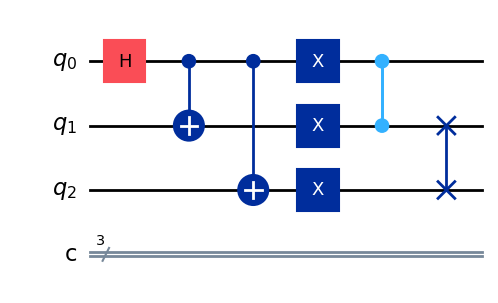

In [ ]:
qc2 = QuantumCircuit() #Agrege el numero de qubits y el numero de bits clásicos



qc2.cz(0,1)#Dejar este puesto porque no conocen el dibujo
qc2.swap(1,2)# Dejar este puesto porque no conocen el dibujo
qc2.draw('mpl')

### 4. Agregamos mediciones

Para agregar una medicion necesitamos tener un bit clásico donde almacenar el resultado de la medida. Para guardar la medida del qubit $m$ en el bit clasico $n$, pondremos:
``qc.measure(m,n)``.
De manera rápida, si tenemos una lista de índices de qubits, por ejemplo,  ``[0,1,2]`` y una lista de índices de bits clásicos  ``[3,4,5]``, podemos escribir  ``qc.measure([0,1,2],[3,4,5])``.

#### **Ejercicio 3**: Cree el siguiente circuito cuántico:

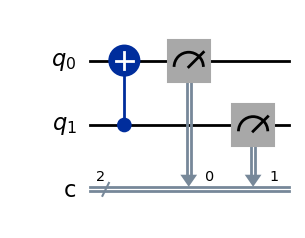

In [ ]:
qc3 =



qc3.draw('mpl')

#### **Ejercicio 4**: Cree el siguiente circuito cuántico:

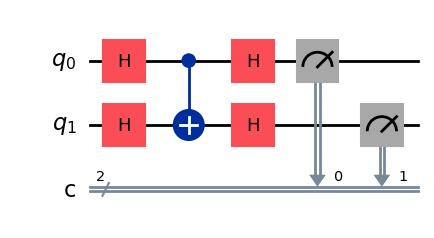

In [ ]:
qc4 =


qc4.draw('mpl')

### 5. Puertas cuánticas avanzadas

Además de las puertas básicas de uno y dos qubits, Qiskit también incluye puertas y operaciones más complejas que resultan esenciales para algoritmos cuánticos avanzados. Un ejemplo fundamental es la Transformada de Fourier Cuántica (QFT), que juega un papel clave en algoritmos como Shor y Quantum Phase Estimation (QPE).

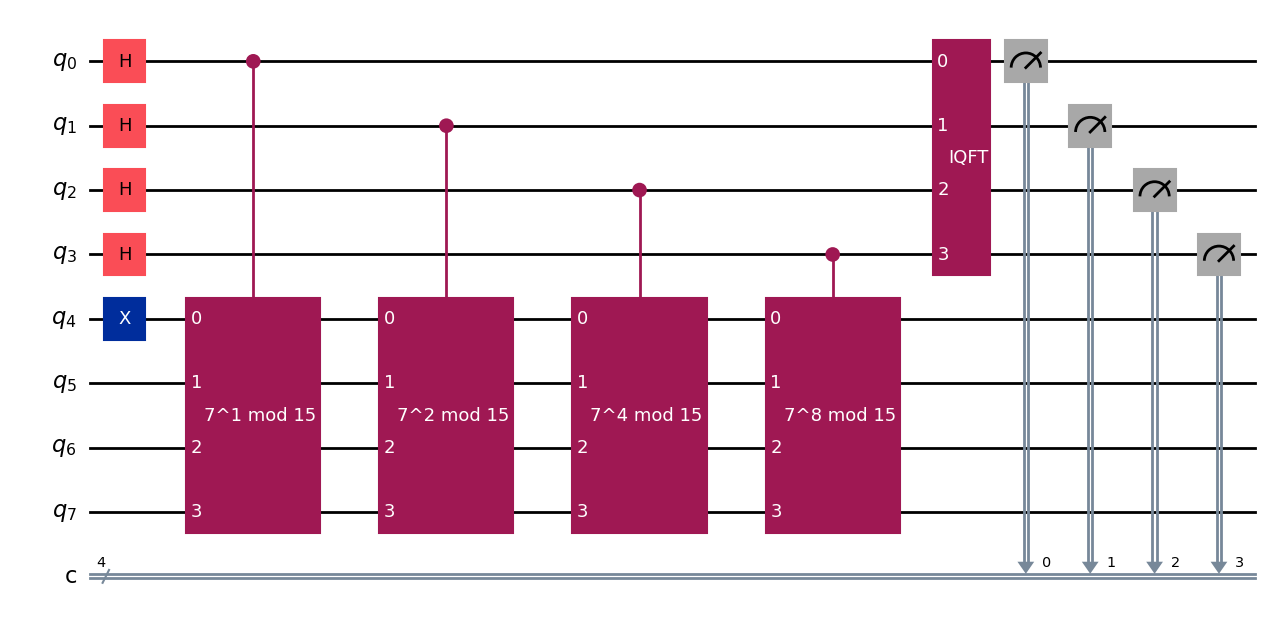

(Algoritmo de Shor implementado para $N=15$)

Estas operaciones suelen involucrar múltiples qubits y fases controladas, y Qiskit permite utilizarlas mediante funciones predefinidas, sin necesidad de construirlas manualmente desde cero. Aunque no entraremos en detalle, puedes revisar un listado de puertas  disponibles en [esta documentación.](https://docs.quantum.ibm.com/api/qiskit/circuit_library).


Hemos construido nuestros primeros circuitos, aplicado puertas y realizado mediciones. Ahora pasaremos a **simular y visualizar** el comportamiento de estos circuitos, para ver cómo se comportan y qué resultados esperaríamos en un computador cuántico real.

# Parte 3: Simulación

Una vez que hemos construido un circuito cuántico, el siguiente paso es **simular su ejecución** para obtener resultados. Qiskit nos ofrece varias formas de simular, dependiendo de lo que queramos observar. Por ejemplo:

* **Resultados post medición**:  En este caso utilizamos ``AerSimulator`` o ``Sampler``.
* **Valores de expectación**: En este caso utilizamos ``Estimator``.

En este taller nos centraremos en simulación de **resultados post medición**, pero si quieres conocer cómo funcionan las otras funciones puedes revisar esta [documentación](https://docs.quantum.ibm.com/guides/primitives), o la [siguiente](https://docs.quantum.ibm.com/api/qiskit/primitives) en caso que quieras ver las de la última versión de qiskit.


### Resultados post medición

En este tipo de simulación, lo que se hace es ejecutar el circuito muchas veces (esto se conoce como **"shots"**) incluyendo las mediciones al final. El objetivo es **recolectar estadísticas sobre los resultados posibles**, como en un experimento físico real.

Dependiendo del método que se utilice:

- Con `AerSimulator`, obtendremos un **diccionario de frecuencias** (por ejemplo, `{'00': 500, '11': 524}`).
- Con `Sampler`, obtendremos una **quasi distribución de probabilidad** (`QuasiDistribution`), que estima directamente la probabilidad de cada resultado.

Ambas herramientas repiten internamente el circuito muchas veces, aunque su forma de presentar los resultados es diferente.

**Nota:** En versiones anteriores de Qiskit, el simulador más común era `AerSimulator` y, aunque aún es funcional y útil para fines didácticos, en Qiskit 1.0+ (actualmente en la versión estable 2.02) se promueve el uso del nuevo flujo basado en `Sampler` y `Estimator`, ya que unifican la forma de simular y ejecutar circuitos tanto en software como en hardware real.

En este taller usaremos ambos enfoques para ver la diferencia. Simularemos el ``qc3`` y ``qc4`` de los ejercicios 3 y 4 con ambos métodos.

#### ``AerSimulator``

Primero importamos el simulador:

In [ ]:
from qiskit_aer import AerSimulator

Ahora, llamamos el simulador con ``NombreQueLeQuierasDar = AerSimulator()`` y luego corremos el simulador con ``NombreQueLeQuierasDar.run(NombreDelCircuito, shots=NroDeShots)``

In [ ]:
sim = AerSimulator()
job = sim.run(qc3,shots=1024) #Nota: no es necesario que se llame job, uno puede llamarlo como quiera, pero "job" es lo usual.

Ahora, para obtener los resultados utilizamos ``job.result()``

In [ ]:
result = job.result() #Nota2: si utilizaron otro nombre en vez de job en el paso anterior, aquí deben utilizar ese nombre.

Ahora, en el caso de ``AerSimulator()``, lo que obtenemos es la frecuencia de cada resultado, en este caso, para obtener esa frecuencia utilizamos ``result.get_counts()``, y luego para graficar utlizamos ``plot_histogram(counts)``:

In [ ]:
counts = result.get_counts()
plot_histogram(counts)

Se obtubo que los 1024 shots dieron como resultado $|00\rangle$, lo cual tiene sentido porque el circuito era:
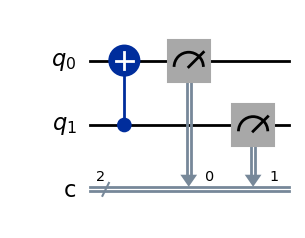

Y **qiskit siempre inicia los circuitos con los qubits en 0**.

##### **Ejercicio 5**: Realice la simulación y visualización de resultados para ``qc4``.

In [ ]:
sim =
job2 = sim.run(qc4,shots=1024)
result2 =
counts2 =


Si te fijas, se obtuvieron los mismos resultados, lo cual tiene sentido porque, como demostramos en práctica, **¡ambos circuitos son equivalentes!**.

#### ``Sampler``

Ahora hagamos la simulación de ``qc3`` con ``Sampler``. En primer lugar, importamos el simulador:

In [ ]:
from qiskit_aer.primitives import Sampler

Ahora, al igual que con AerRimulator, llamamos el simulador con ``NombreQueLeQuierasDar = Sampler()`` y luego corremos el simulador con ``NombreQueLeQuierasDar.run(NombreDelCircuito, shots=NroDeShots)``

In [ ]:
sampler = Sampler()
job = sampler.run(qc3, shots=1024)

Para obtener los resultados, también utlizamos ``result = job.result()``:

In [ ]:
result = job.result()

La diferencia viene ahora, ``Sampler`` lo que entrega son probabilidades (o si prefieres verlo asi, frecuencia relativa), por lo que para obtener estas probabilidades debemos utilizar ``result.quasi_dists``. Para graficar también se utiliza ``plot_histograme(counts)``.

In [ ]:
counts = result.quasi_dists
plot_histogram(counts)

**Nota:** Si intentan usar ``.get_counts()``  con ``Sampler`` les lanzará error, lo mismo que si intentan utilizar ``quasi_dists`` con ``AerSimulator``.

##### **Ejercicio 6**: Realice la simulación y visualización de resultados para ``qc4``.

In [ ]:
sampler =






Ahora pondremos en práctica lo aprendido.

# Parte 4: Creando un estado de Bell

Recordemos que los estados de Bell son cuatro estados de dos qubits maximalmente entrelazados:
* $|\beta_{00}\rangle=\frac{1}{\sqrt{2}}(|00\rangle+|11\rangle)$
* $|\beta_{01}\rangle=\frac{1}{\sqrt{2}}(|01\rangle+|10\rangle)$
* $|\beta_{10}\rangle=\frac{1}{\sqrt{2}}(|00\rangle-|11\rangle)$
* $|\beta_{11}\rangle=\frac{1}{\sqrt{2}}(|01\rangle-|10\rangle)$

#### **Ejercicio 7**: Cree un circuito que nos entregue $|\beta_{00}\rangle$ y que contenga al final las mediciones en cada uno de los qubits.

**Hint**: No olvide que qiskit comienza con cada qubit en $|0\rangle$. Además recuerde que para crear los estados de Bell, primero agregabamos superposición y luego entrelazamiento.

In [ ]:
qc5 =



qc5.draw('mpl')

#### **Ejercicio 8**: Haga la simulación con ``AerSimulator`` y haga el histograma de los resultados.

In [ ]:
sim = AerSimulator()
job = sim.run(qc5, shots=1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

#### **Ejercicio 9**: Haga la simulación con ``Sampler`` y haga el histograma.

In [ ]:
sampler = Sampler()
job = sampler.run(qc5, shots=1024)
result = job.result()
counts = result.quasi_dists
plot_histogram(counts)

# **Desafío** (Por si lo quieren trabajar en la casa)

Haga los circuitos que generan los otros tres estados de Bell.

# Referencias



1.   [Taller 1: Introducción qiskit, ECC 2025 MIRO. Constanza Vargas, Barbara Candia, Luciano Pereira.](https://github.com/mauricio-alexis-casanova-valdenegro/ECC_2025_testing/blob/main/talleres/taller_1_Introducción_Qiskit_Soluciones.ipynb)
2.  [Qiskit 101 & 102](https://learning.quantum.ibm.com/course/qiskit-101-and-102).
3. [Get started: Hello world](https://docs.quantum.ibm.com/guides/hello-world)



# Contacto

María Paz Barría <br>
Estudiante Doctorado en Ciencias Físicas <br>
Universidad de Concepción<br>
marbarria@udec.cl